<a href="https://colab.research.google.com/github/hafizbudi/active-learning/blob/main/Digits_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DIGITS Active Learning**

## **Connect to google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd gdrive/My Drive/Project/active_learning

## **Install modAL framework**

In [ ]:
pip install modal

## **Load library and digits data**

Digits collected from sklearn

In [ ]:
import numpy as np
import csv
import pandas as pd

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt

## Set initial data and split data set

In [93]:
instance_number = []
accuracy_result = []

In [118]:
n_data = 1500
initial_data = int(0.75*n_data*0.4)

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X[:n_data], y[:n_data],test_size=0.25)
print("y train",len(y_train))
print("y test",len(y_test))

initial_idx = np.random.choice(range(len(X_train)), size=initial_data, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
print("y initial",len(y_initial))
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
print("y pool",len(y_pool))

y train 1125
y test 375
y initial 450
y pool 675


## Active learner initialization
Using random forest for estimator and uncertainty sampling for query strategy

In [119]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

Set the query number

In [120]:
n_queries = int(0.1*n_data)

In [121]:
accuracy_scores = [learner.score(X_test, y_test)]
print("Initial accuracy : ", accuracy_scores[0])

Initial accuracy :  0.9573333333333334


## Active learning loop

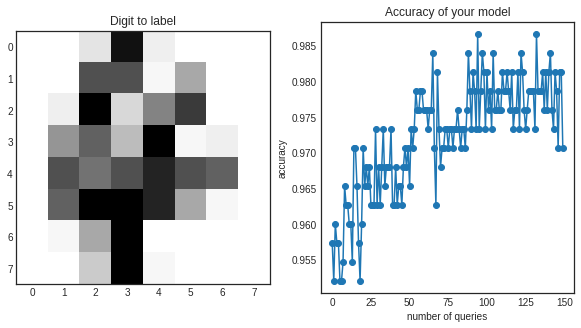

Which digit is this?


In [122]:
accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(8, 8))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print("Which digit is this?")
    #y_new = np.array([int(input())], dtype=int)
    y_new = np.array([int(y_pool[query_idx])],dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))

## Accuracy visualization

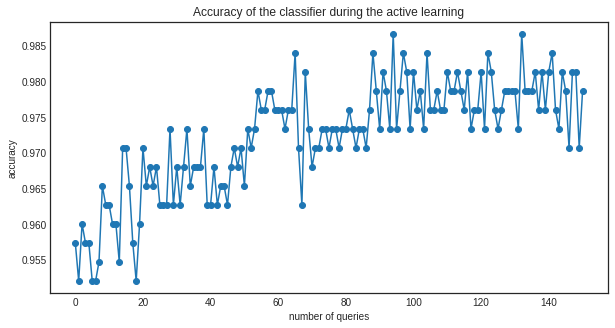

accuracy max :  0.9866666666666667
accuracy min :  0.952


In [123]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()

max_acc = max(accuracy_scores)
min_acc = min(accuracy_scores)

print ("accuracy max : ",max_acc)
print ("accuracy min : ",min_acc)

## **Save result to array**

In [124]:
instance_number.append(n_data)
accuracy_result.append(max_acc)

In [125]:
print(instance_number)
print(accuracy_result)

[100, 500, 1000, 1500]
[0.8, 1.0, 0.976, 0.9866666666666667]
